In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier # Our chosen ML model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import joblib # For saving the trained model later

# --- Load the dataset ---
# This dataset contains both diabetes and hypertension info
file_path = '../data/raw/diabetes_prediction_dataset.csv'
health_df = pd.read_csv(file_path) # Renaming df to 'health_df' as it covers more

print("Libraries imported and dataset loaded successfully for hypertension model.")
print(f"Initial dataset shape: {health_df.shape}")

Libraries imported and dataset loaded successfully for hypertension model.
Initial dataset shape: (100000, 9)


In [2]:
# Identify the NEW target variable: 'hypertension'
target_hypertension = 'hypertension'

# Identify features (all columns except the new target and the old 'diabetes' target for clarity)
# We explicitly drop 'diabetes' to focus purely on hypertension prediction here.
features_hypertension = health_df.drop(columns=[target_hypertension, 'diabetes'])

# Separate numerical and categorical features for different preprocessing
# These lists will be slightly different from before, as 'hypertension' and 'diabetes' are now out.
numerical_features_h = features_hypertension.select_dtypes(include=np.number).columns.tolist()
categorical_features_h = features_hypertension.select_dtypes(include='object').columns.tolist()

print(f"Target variable for Hypertension: {target_hypertension}")
print(f"Numerical features for Hypertension model: {numerical_features_h}")
print(f"Categorical features for Hypertension model: {categorical_features_h}")

Target variable for Hypertension: hypertension
Numerical features for Hypertension model: ['age', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level']
Categorical features for Hypertension model: ['gender', 'smoking_history']


In [3]:
# Create preprocessing pipeline for numerical features: just scaling
numerical_transformer_h = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Create preprocessing pipeline for categorical features: one-hot encoding
categorical_transformer_h = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor using ColumnTransformer
preprocessor_h = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer_h, numerical_features_h),
        ('cat', categorical_transformer_h, categorical_features_h)
    ])

print("Preprocessing transformers defined for hypertension model.")

Preprocessing transformers defined for hypertension model.


In [4]:
# Separate features (X) and target (y) for hypertension
X_h = health_df.drop(columns=[target_hypertension, 'diabetes'])
y_h = health_df[target_hypertension]

# Split the data into training and testing sets for hypertension
# Stratify by y_h because hypertension might also be imbalanced
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_h, y_h, test_size=0.20, random_state=42, stratify=y_h)

print(f"Data split into training and testing sets for Hypertension:")
print(f"X_train_h shape: {X_train_h.shape}")
print(f"X_test_h shape: {X_test_h.shape}")
print(f"y_train_h distribution:\n{y_train_h.value_counts(normalize=True)}")
print(f"y_test_h distribution:\n{y_test_h.value_counts(normalize=True)}")

Data split into training and testing sets for Hypertension:
X_train_h shape: (80000, 7)
X_test_h shape: (20000, 7)
y_train_h distribution:
hypertension
0    0.92515
1    0.07485
Name: proportion, dtype: float64
y_test_h distribution:
hypertension
0    0.92515
1    0.07485
Name: proportion, dtype: float64


In [5]:
# Create the full pipeline: Preprocessing + Classifier for Hypertension
model_pipeline_h = Pipeline(steps=[
    ('preprocessor', preprocessor_h),
    ('classifier', RandomForestClassifier(random_state=42)) # Using RandomForest again for consistency
])

print("Training the hypertension model pipeline...")
# Train the pipeline on the training data
model_pipeline_h.fit(X_train_h, y_train_h)

print("Hypertension model training completed.")

Training the hypertension model pipeline...
Hypertension model training completed.


In [6]:
# Make predictions on the test set for hypertension
y_pred_h = model_pipeline_h.predict(X_test_h)

# Get prediction probabilities for the positive class (hypertension=1)
y_pred_proba_h = model_pipeline_h.predict_proba(X_test_h)[:, 1]

print("Predictions made on the hypertension test set.")

Predictions made on the hypertension test set.



Hypertension Model Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.99      0.96     18503
           1       0.19      0.03      0.05      1497

    accuracy                           0.92     20000
   macro avg       0.56      0.51      0.50     20000
weighted avg       0.87      0.92      0.89     20000


Hypertension Model Confusion Matrix:
[[18325   178]
 [ 1454    43]]


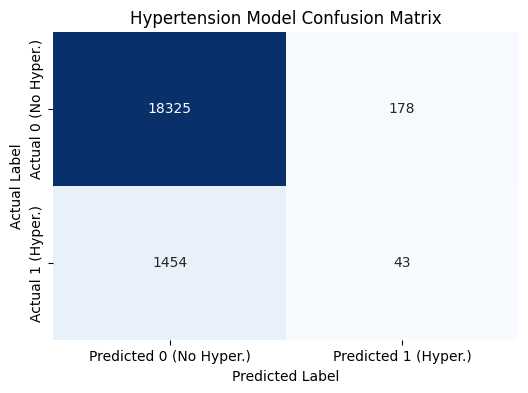


--- Hypertension Model Performance Metrics ---
Accuracy: 0.9184
Precision (Class 1): 0.1946
Recall (Class 1): 0.0287
F1-Score (Class 1): 0.0501
ROC AUC Score: 0.7747

Remember to interpret metrics for Class 1 (Hypertension) carefully due to potential imbalance.


In [7]:
# --- Classification Report ---
print("\nHypertension Model Classification Report:")
print(classification_report(y_test_h, y_pred_h))

# --- Confusion Matrix ---
cm_h = confusion_matrix(y_test_h, y_pred_h)
print("\nHypertension Model Confusion Matrix:")
print(cm_h)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm_h, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted 0 (No Hyper.)', 'Predicted 1 (Hyper.)'],
            yticklabels=['Actual 0 (No Hyper.)', 'Actual 1 (Hyper.)'])
plt.title('Hypertension Model Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

# --- Key Metrics ---
accuracy_h = accuracy_score(y_test_h, y_pred_h)
precision_h = precision_score(y_test_h, y_pred_h)
recall_h = recall_score(y_test_h, y_pred_h)
f1_h = f1_score(y_test_h, y_pred_h)
roc_auc_h = roc_auc_score(y_test_h, y_pred_proba_h)

print(f"\n--- Hypertension Model Performance Metrics ---")
print(f"Accuracy: {accuracy_h:.4f}")
print(f"Precision (Class 1): {precision_h:.4f}")
print(f"Recall (Class 1): {recall_h:.4f}")
print(f"F1-Score (Class 1): {f1_h:.4f}")
print(f"ROC AUC Score: {roc_auc_h:.4f}")

print("\nRemember to interpret metrics for Class 1 (Hypertension) carefully due to potential imbalance.")


Top 10 Feature Importances for Hypertension Model:
bmi                        0.328873
age                        0.256007
blood_glucose_level        0.179401
HbA1c_level                0.174732
heart_disease              0.013510
smoking_history_No Info    0.008160
smoking_history_never      0.007046
smoking_history_former     0.006346
gender_Female              0.005900
gender_Male                0.005892
dtype: float64


C:\Users\irann\AppData\Local\Temp\ipykernel_7240\2207578138.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importances_h.head(10).values, y=feature_importances_h.head(10).index, palette='viridis')


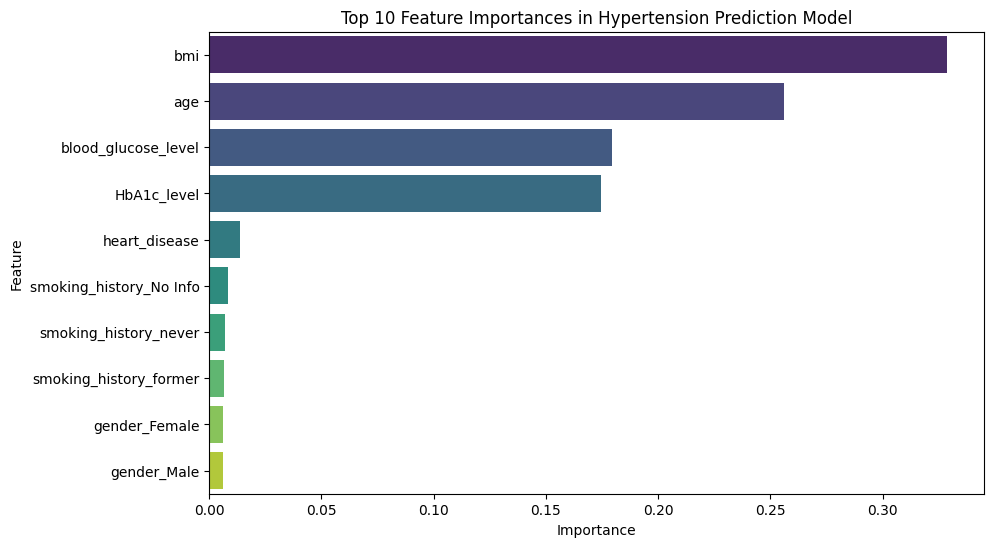

In [8]:
# --- Feature Importance for Hypertension Model ---
if hasattr(model_pipeline_h.named_steps['classifier'], 'feature_importances_'):
    ohe_h = model_pipeline_h.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
    categorical_feature_names_h = ohe_h.get_feature_names_out(categorical_features_h)

    all_feature_names_h = numerical_features_h + list(categorical_feature_names_h)

    importances_h = model_pipeline_h.named_steps['classifier'].feature_importances_
    feature_importances_h = pd.Series(importances_h, index=all_feature_names_h).sort_values(ascending=False)

    print("\nTop 10 Feature Importances for Hypertension Model:")
    print(feature_importances_h.head(10))

    # Visualize feature importances
    plt.figure(figsize=(10, 6))
    sns.barplot(x=feature_importances_h.head(10).values, y=feature_importances_h.head(10).index, palette='viridis')
    plt.title('Top 10 Feature Importances in Hypertension Prediction Model')
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("\nClassifier for hypertension model does not have 'feature_importances_'.")

In [9]:
# Save the trained hypertension model pipeline
joblib.dump(model_pipeline_h, '../models/hypertension_risk_model_pipeline.pkl')

# Save the lists of numerical and categorical features for the hypertension model
joblib.dump(numerical_features_h, '../models/numerical_features_h.pkl')
joblib.dump(categorical_features_h, '../models/categorical_features_h.pkl')

print("Trained hypertension model pipeline and feature lists saved to 'models/' folder.")

Trained hypertension model pipeline and feature lists saved to 'models/' folder.
